In [1]:
import sys
!{sys.executable} -m pip install scipy

import scipy
from scipy.stats import linregress
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 11})




[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
def timespacing_var_to_array(var, dt):
    L = 5e-3
    vars = np.array(['cmts', 'ch2', 'chcl','d','phi','xi', 'rp28'])
#          var_index= 0       1      2      3   4     5     6
    var_index = var
    which_var = str(vars[var_index])
    
    with open(r'/Users/jjmarzia/Desktop/cvisim/figs/salac-grid/conv2/rp'+str(dt)+'.txt','r') as file:
        data = file.read().split(' ')
        # print(data)
        i=0
        for i in range(len(data)):
            if '\n' in data[i]:
                data[i] = data[i].replace('\n', '')
            i=i+1
        # print(data)
        data = [i for i in data if i]
        data = np.array(data)
        data = data.astype(float)
        # data = data*3.16666666667*6.66
    # if var_index == 5:
        return np.linspace(0,L, 28), data, which_var
    # else:
    #     return np.linspace(0,L, dt), data, which_var

[0.00111607 0.00223214 0.00446429 0.00892857]
3.88795406560336


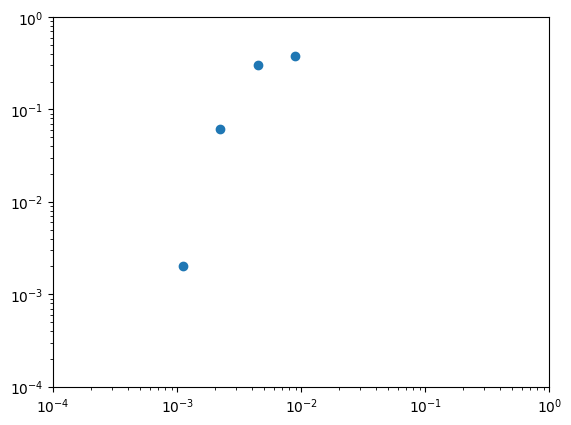

In [6]:
rp1 = timespacing_var_to_array(6, 7)[1]
rp2 = timespacing_var_to_array(6, 31)[1]
rp3 = timespacing_var_to_array(6, 124)[1]
rp4 = timespacing_var_to_array(6, 498)[1]
rp5 = timespacing_var_to_array(6, 1992)[1]

# print(rp1)
rp0 = 50e-6

n12 = np.linalg.norm(rp1-rp2, np.inf)
n13 = np.linalg.norm(rp1-rp3, np.inf)
n14 = np.linalg.norm(rp1-rp4, np.inf)
n15 = np.linalg.norm(rp1-rp5, np.inf)

norms = np.array([n12, n13, n14, n15])/rp0
grids = 1/np.array([896, 448, 224, 112])

print(grids)

plt.xscale("log")
plt.yscale("log")

plt.xlim([1e-4, 1e-0])
plt.ylim([1e-4, 1e-0])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(grids, norms)

print(np.log(slope))

plt.scatter(grids, norms)

plt.savefig('f.svg')
plt.savefig('f.pdf')